In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import matplotlib.pyplot as plt

In [4]:
# Get some dataset

batch_size_train = 256
batch_size_test = 1024

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)),
                               torchvision.transforms.Lambda(torch.flatten)
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)),
                               torchvision.transforms.Lambda(torch.flatten)
                             ])),
  batch_size=batch_size_test, shuffle=True)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:01<00:00, 5.82MB/s]


Extracting files/MNIST/raw/train-images-idx3-ubyte.gz to files/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 244kB/s]


Extracting files/MNIST/raw/train-labels-idx1-ubyte.gz to files/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.03MB/s]


Extracting files/MNIST/raw/t10k-images-idx3-ubyte.gz to files/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 4.12MB/s]

Extracting files/MNIST/raw/t10k-labels-idx1-ubyte.gz to files/MNIST/raw



In [8]:
# Inspect what we are loading
for inputs, targets in train_loader:
    print(inputs.shape, targets.shape)
    print(targets[:20])
    break
    
# We have 256 images of size 28*28 flattened to a vector of size 784 and 256 targets (from 0 to 9)

torch.Size([256, 784]) torch.Size([256])
tensor([2, 0, 1, 2, 3, 7, 6, 2, 5, 0, 0, 9, 1, 7, 1, 8, 5, 4, 0, 1])


In [11]:
# Let's train a simple neural network
# We won't bother with evaluation for now

model = nn.Sequential(
    nn.Linear(784, 256),
    nn.SiLU(),
    nn.Linear(256, 10)
)

# This loss actually contains softmax inside
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Typically we want to also decay the learning rate during training
#scheduler = ...

In [13]:
# Let's run one epoch
for inputs, targets in train_loader:
    outputs = model(inputs)
    loss = loss_fn(outputs, targets)
    print(loss.item())
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #scheduler.step()
    
# Loss nicely decreases

2.3062589168548584
2.2896127700805664
2.248093843460083
2.2312862873077393
2.2326042652130127
2.204360008239746
2.1466307640075684
2.1452786922454834
2.132887363433838
2.076507568359375
2.0842461585998535
2.0514132976531982
2.0086188316345215
2.014268398284912
1.9756686687469482
1.9668374061584473
1.9281772375106812
1.9159483909606934
1.8484389781951904
1.8676234483718872
1.8273248672485352
1.8034087419509888
1.7859783172607422
1.7495163679122925
1.7562289237976074
1.7370182275772095
1.674819827079773
1.6658105850219727
1.6580911874771118
1.6517258882522583
1.6181461811065674
1.6050772666931152
1.546630859375
1.5383567810058594
1.5484799146652222
1.4782394170761108
1.4338698387145996
1.4172595739364624
1.4064375162124634
1.4216359853744507
1.336658000946045
1.3788414001464844
1.2903183698654175
1.3266639709472656
1.2606405019760132
1.2492209672927856
1.1988437175750732
1.213112711906433
1.3070881366729736
1.148504614830017
1.1649038791656494
1.1510217189788818
1.1239436864852905
1.1050

In [15]:
# What is model output?
for inputs, targets in test_loader:
    print(model(inputs[:1]))
    print(targets[:1])
    break
    
# Outputs are not probabilities, but inputs to softmax. But highest number is still class with highest probability

tensor([[-4.0210, -0.4884,  0.3830, -1.5267,  4.8588, -1.2310, -0.8766,  0.4993,
          0.4864,  2.1030]], grad_fn=<AddmmBackward0>)
tensor([4])


## Neural networks building blocks

Here we go over basic building blocks of typical neural networks.

I recommend checking Pytorch documentation, e.g. (https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss, https://pytorch.org/docs/stable/generated/torch.nn.Linear.html). 

Most important things to understand are:

* shapes of input
* shapes of parameters
* output shape

In [16]:
# Let's start with puny linear layer

n_inputs = 64
n_outputs = 32

# I don't like bias. It's coarse and rough and irritating and it gets everywhere.
# Also, forgetting about it leads to bugs.
layer = nn.Linear(n_inputs, n_outputs, bias=False)
layer

Linear(in_features=64, out_features=32, bias=False)

In [17]:
# For some reason, the shape is n_output x n_input
layer.weight.shape

torch.Size([32, 64])

In [20]:
# All of this works

layer(torch.rand(64)).shape

torch.Size([32])

In [21]:
layer(torch.rand(5, 64)).shape

torch.Size([5, 32])

In [22]:
layer(torch.rand(1,2,3,4,5,64)).shape

torch.Size([1, 2, 3, 4, 5, 32])

# Nonlinearities

In [24]:
# Doing this is in most cases not a great idea:
model = nn.Sequential(
    nn.Linear(200, 300),
    nn.Linear(300, 400)
)

# Because what model computes is (xA)B
# Which is same as x(AB) and if we say AB = C, then we can just have
model = nn.Linear(200, 400)

# Also former formulation is not even convex (imagine scalars and what happens when both weight are zero)

In [25]:
# So we insert nonlinear functions in between:
model = nn.Sequential(
    nn.Linear(200, 300),
    nn.SiLU(),
    nn.Linear(300, 400)
)

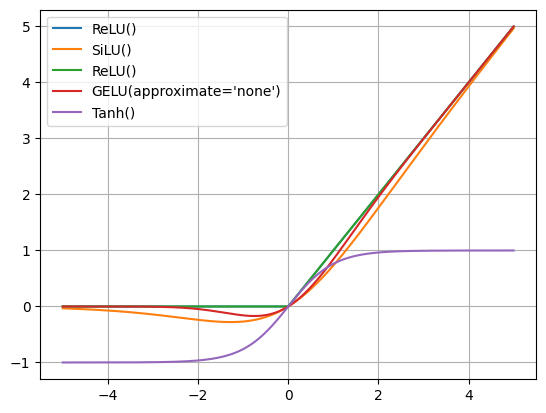

In [32]:
# What are these functions?

for f in [nn.ReLU(), nn.SiLU(), nn.ReLU(), nn.GELU(), nn.Tanh()]:
    X = torch.linspace(-5, 5, 1001)
    plt.plot(X, f(X), label=str(f))
    
plt.grid()
plt.legend()

These days we mostly use Relu, silu, gelu. Tanh is not used, due to vanishing gradient at the ends
(happens when your weights get too large).

Why is gelu/silu slighly better than relu?

"We offer no explanation as to why these architectures seem to work; we attribute their success, as all else, to divine benevolence" (https://arxiv.org/pdf/2002.05202)

In [ ]:
# So the simple multi-layer perceptron is just multiple linear layers with nonlinear functions in between, e.g.:

model = nn.Sequential(
    nn.Linear(784, 256),
    nn.SiLU(),
    nn.Linear(256, 256),
    nn.SiLU(),
    nn.Linear(256, 256),
    nn.SiLU(),
    nn.Linear(256, 10),
)

# Trained with loop we seen before

## Bringing structure

Usually the input is not one vector, but an image or some sequence (e.g. words).

In [34]:
# Let's load some other image dataset

normalize = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10(root='./data', train=True, transform=torchvision.transforms.Compose([
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomCrop(32, 4),
        torchvision.transforms.ToTensor(),
        normalize,
    ]), download=True),
    batch_size=16, shuffle=True)

for input, target in train_loader:
    print(input.shape, target.shape)
    print(target)
    break

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170M/170M [01:40<00:00, 1.70MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
torch.Size([16, 3, 32, 32]) torch.Size([16])
tensor([6, 2, 7, 7, 7, 5, 1, 8, 5, 4, 7, 9, 5, 0, 8, 6])


In [35]:
# Input shape is:
# (Batch, channels, height, width)
# Do not ask why are channels in the middle

In [56]:
conv_layer = nn.Conv2d(3,128,5, bias=False)
conv_layer(input).shape

# We got 128 output channels and input is shrink by four (this is prevented by using padding)

torch.Size([16, 128, 28, 28])

In [57]:
conv_layer_with_pad = nn.Conv2d(3,128,5,padding=2)
conv_layer_with_pad(input).shape

torch.Size([16, 128, 32, 32])

In [42]:
# For more, check out https://fleuret.org/dlc/materials/dlc-slides-4-4-convolutions.pdf

## 1x1 convolution and im2col

One could ask is 1x1 convolution useful. 
Just look at input, output and weight shapes and it should be obvious.

In [47]:
conv1x1 = nn.Conv2d(16, 32, 1, bias=False)

conv1x1(torch.randn(5,16,10,10)).shape

# It just projects channels to some other represenation
# Each image piece of input size 16 gets changed to size 32

torch.Size([5, 32, 10, 10])

In [49]:
# It is basically a linear mapping
test_inp = torch.randn(5,16,10,10)
conv1x1(test_inp) - test_inp.permute(0,2,3,1).matmul(conv1x1.weight[:,:,0,0].T).permute(0,3,1,2)

tensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            2.9802e-08, -2.9802e-08]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          ...,
     

In [52]:
# Actualy whole convolution is a linear mapping, if you preprocess the input
unfolded_input = nn.Unfold(5)(input)
unfolded_input.shape

torch.Size([16, 75, 784])

In [53]:
conv_layer.weight.shape

torch.Size([128, 3, 5, 5])

In [64]:
(conv_layer(input).flatten() - unfolded_input.permute(0,2,1).matmul(conv_layer.weight.flatten(1).T).permute(0,2,1).flatten())

tensor([-1.1921e-07, -2.3842e-07,  5.9605e-08,  ..., -8.9407e-08,
         5.9605e-08,  0.0000e+00], grad_fn=<SubBackward0>)

## Embedding layer

Embedding - conversion of any object to vector

Pytorch embedding layer - convert object id (e.g. word id to vector)

In [65]:
vocab_size = 1000
embed_size = 128
embed = nn.Embedding(vocab_size, embed_size)
embed.weight.shape

torch.Size([1000, 128])

In [67]:
embed(torch.LongTensor([2,3,4])).shape

torch.Size([3, 128])

In [69]:
embed(torch.LongTensor([2])), embed.weight[2]

(tensor([[-0.9237, -0.6472,  1.1971,  0.9994, -1.2206, -1.4764,  1.0016,  1.1442,
           1.2410, -0.3481, -0.7893,  1.3535,  1.4104,  1.1783, -1.5198,  0.7974,
           0.4115, -0.0607, -1.8658,  0.6741,  0.2586, -0.2132,  0.1654,  0.5073,
          -1.6816, -0.8054,  0.5403, -0.1652,  0.0464,  0.8734,  0.6037,  1.0150,
          -0.2476,  0.3262,  1.2318, -0.6452,  1.7648,  0.8025,  0.9823, -0.4644,
           0.9282,  0.1903,  0.2018,  0.0560,  0.5044, -0.6005, -0.6539, -0.3771,
          -0.0761,  0.5647,  0.1204, -0.6129,  1.5916,  1.2390,  1.2994, -1.6607,
           0.1269, -0.1586, -0.4864,  0.2726,  1.0013,  0.9057,  0.5320,  0.8194,
          -0.5096, -2.7798, -0.1462,  0.2915,  0.1753, -0.3145, -1.1040,  0.4925,
          -0.6176, -0.7947,  3.1103, -1.3930, -1.0739,  0.9094,  0.6027, -0.8135,
          -1.5648, -0.1773,  0.1403, -0.8172,  0.2549,  1.4679, -0.7352,  0.6699,
           1.7499,  1.9686,  0.0284, -0.4604,  0.2086,  1.5432, -0.7240,  0.7032,
           0.594

## Transformer

https://fleuret.org/dlc/materials/dlc-slides-13-2-attention-mechanisms.pdf